In [1]:
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For numerical operations
import matplotlib.pyplot as plt #For visualization
%matplotlib inline
import seaborn as sns

import category_encoders as ce                         #For target encoding
from sklearn.model_selection import train_test_split   #For splitting the data into train and test sets 
from sklearn.preprocessing import StandardScaler     #For scaling numerical features

# For Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
filepath = r"C:\Users\Special User\Downloads\Expresso_churn_dataset.csv"

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [7]:
# Impute missing values with the median for numerical columns
numerical_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 
                  'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [8]:
# Checking the data types of the columns
print(df[['REGION', 'TOP_PACK']].dtypes)

# Impute missing values with mode for categorical columns
df['REGION'] = df['REGION'].fillna(df['REGION'].mode()[0])
df['TOP_PACK'] = df['TOP_PACK'].fillna(df['TOP_PACK'].mode()[0])

# Verify if the missing values are filled
print(df[['REGION', 'TOP_PACK']].isnull().sum())

REGION      object
TOP_PACK    object
dtype: object
REGION      0
TOP_PACK    0
dtype: int64


In [9]:
df = df.drop_duplicates()

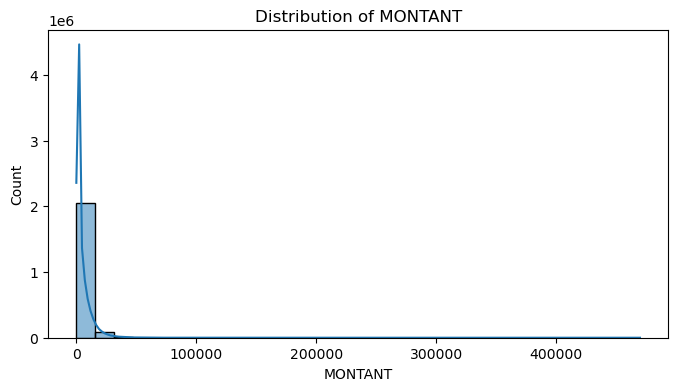

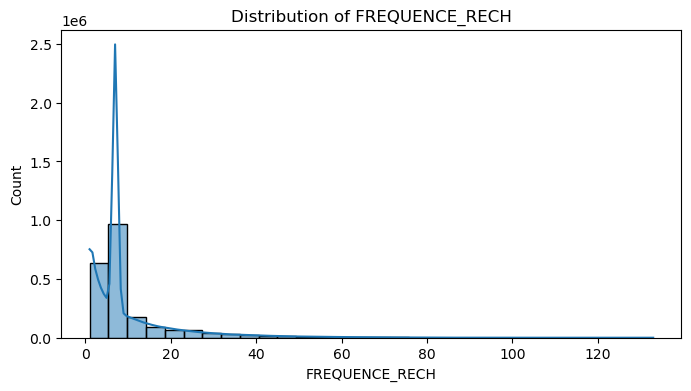

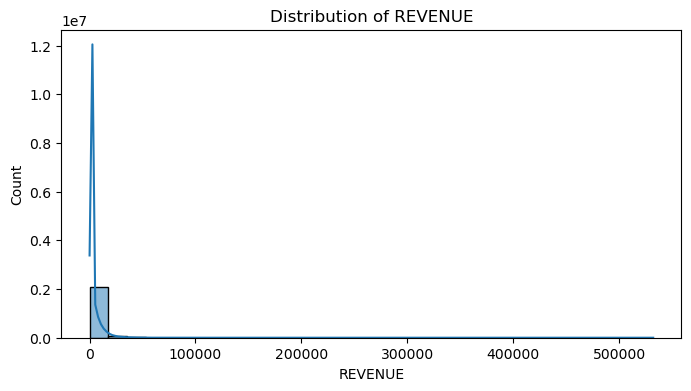

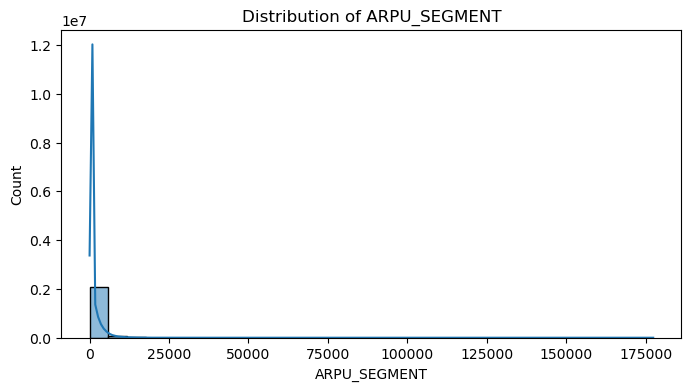

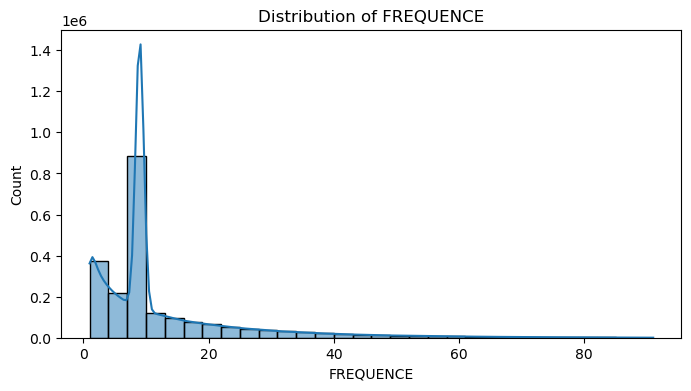

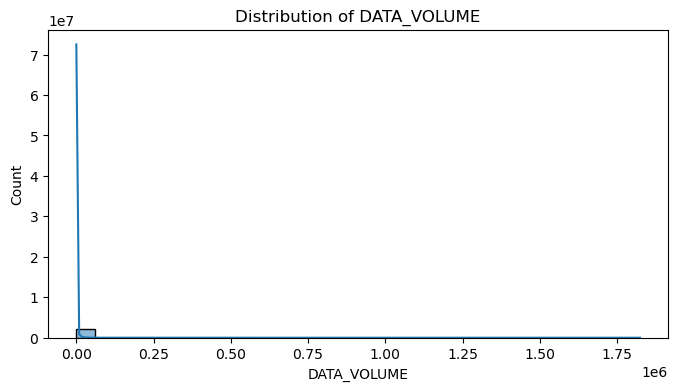

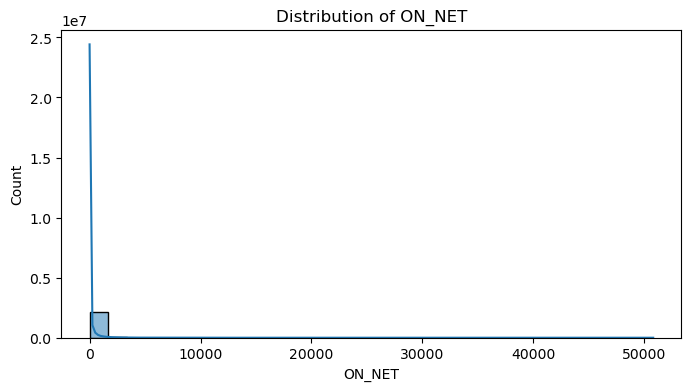

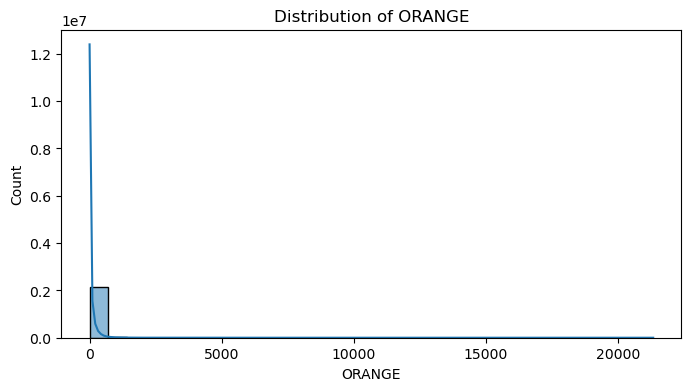

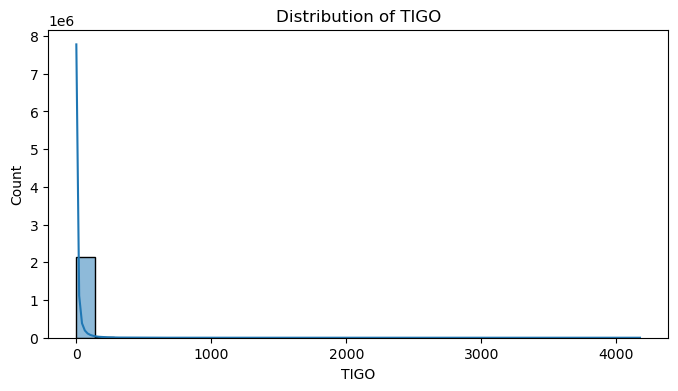

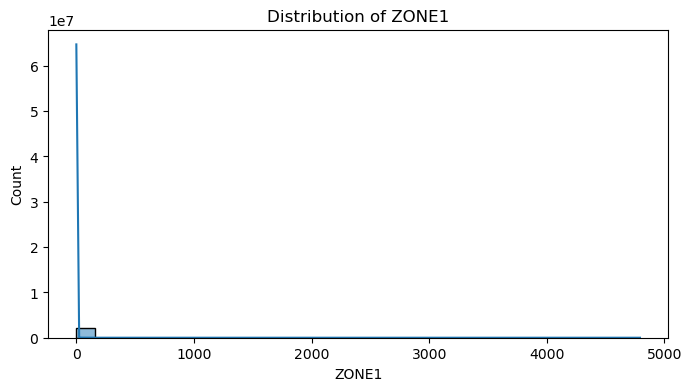

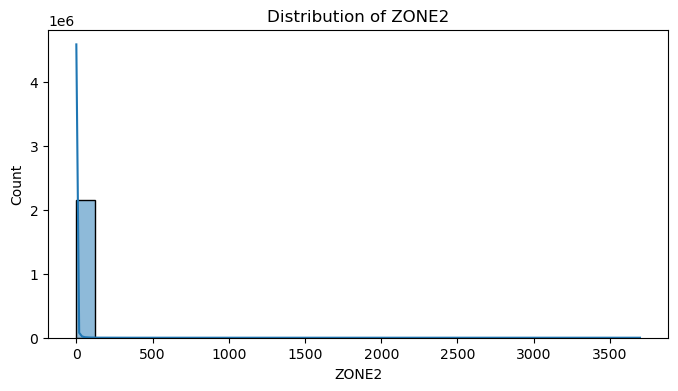

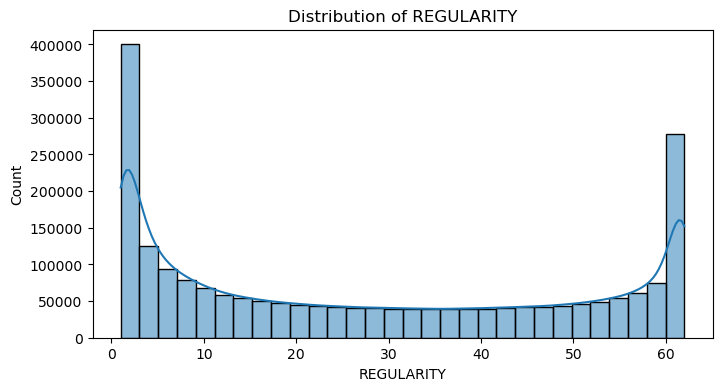

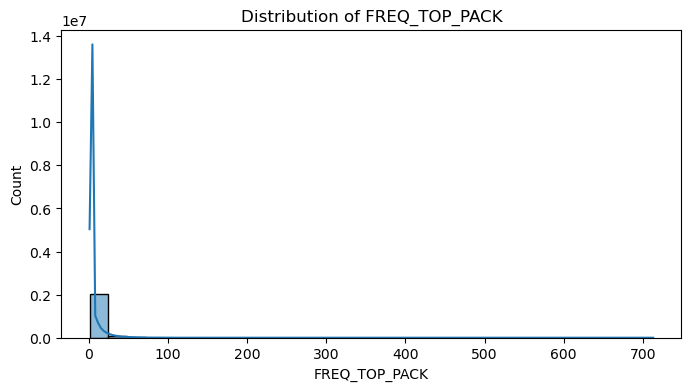

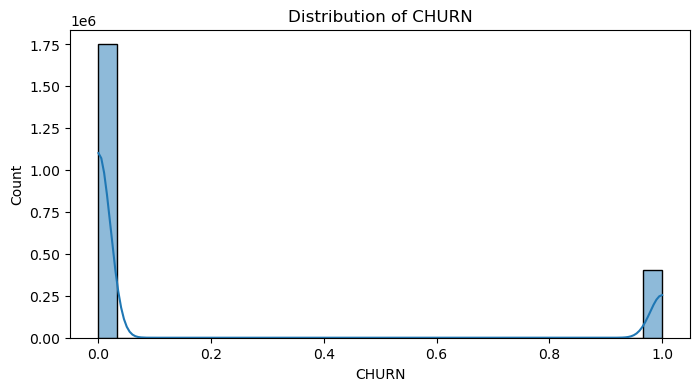

In [10]:
# Numerical Variables Univariate Analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through numerical columns for histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [11]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06
mean,4.642559e+03,9.937994e+00,4.664511e+03,1.554841e+03,1.230020e+01,1.835675e+03,1.861355e+02,6.781430e+01,1.286287e+01,1.564947e+00,2.352743e+00,2.804251e+01,7.482205e+00,1.875474e-01
std,5.853728e+03,1.090754e+01,5.970967e+03,1.990320e+03,1.219326e+01,9.606472e+03,7.057040e+02,1.600853e+02,4.113047e+01,1.171653e+01,8.547771e+00,2.228686e+01,9.594821e+00,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+03,4.000000e+00,1.901000e+03,6.340000e+02,6.000000e+00,2.310000e+02,1.200000e+01,2.000000e+01,6.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,4.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000e+00,2.000000e+00,2.400000e+01,5.000000e+00,0.000000e+00
75%,4.600000e+03,1.000000e+01,4.700000e+03,1.567000e+03,1.300000e+01,2.890000e+02,5.500000e+01,4.100000e+01,6.000000e+00,1.000000e+00,2.000000e+00,5.100000e+01,6.000000e+00,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4.792000e+03,3.697000e+03,6.200000e+01,7.130000e+02,1.000000e+00


In [12]:
df['CHURN'].unique()

array([0, 1], dtype=int64)

In [14]:
numeric_df = df.select_dtypes(include = ['number'])

Skewness > 0: The feature is positively skewed (right-tailed).

Skewness < 0: The feature is negatively skewed (left-tailed).

Skewness ≈ 0: The feature is approximately symmetric.



In [15]:
skewness = numeric_df.skew()
print(skewness)


MONTANT             5.350294
FREQUENCE_RECH      2.884796
REVENUE             5.245969
ARPU_SEGMENT        5.245987
FREQUENCE           2.451972
DATA_VOLUME        49.364137
ON_NET             10.156144
ORANGE             10.374638
TIGO               19.831105
ZONE1              89.538590
ZONE2             119.751659
REGULARITY          0.247408
FREQ_TOP_PACK       5.538252
CHURN               1.600885
dtype: float64


In [16]:
#Best for right-skewed data with positive value
df['MONTANT_log'] = np.log1p(df['MONTANT'])
df['DATA_VOLUME_log'] = np.log1p(df['DATA_VOLUME'])


In [17]:
#Useful for moderate skewness.
df['FREQUENCE_RECH_sqrt'] = np.sqrt(df['FREQUENCE_RECH'])


In [18]:
#Effective for non-normal data. However, it requires all values to be positive.
from scipy.stats import boxcox
df['ON_NET_boxcox'], _ = boxcox(df['ON_NET'] + 1)  # Add 1 to handle zeros


In [19]:
#Handles both positive and negative values
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['ZONE1_transformed'] = pt.fit_transform(df[['ZONE1']])


In [20]:
transformed_skewness = df[['MONTANT_log', 'DATA_VOLUME_log', 'ON_NET_boxcox']].skew()
print(transformed_skewness)


MONTANT_log       -0.481131
DATA_VOLUME_log   -0.641725
ON_NET_boxcox     -0.011545
dtype: float64


In [21]:
df.describe(include ='object')

,user_id,REGION,TENURE,MRG,TOP_PACK
count,2154048,2154048,2154048,2154048,2154048
unique,2154048,14,8,1,140
top,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,1362570,2043201,2154048,1220396


In [22]:
df['TOP_PACK'].unique()

array(['On net 200F=Unlimited _call24H', 'All-net 500F=2000F;5d',
       'On-net 1000F=10MilF;10d', 'Data:1000F=5GB,7d',
       'Mixt 250F=Unlimited_call24H',
       'MIXT:500F= 2500F on net _2500F off net;2d', 'On-net 500F_FNF;3d',
       'Data: 100 F=40MB,24H', 'MIXT: 200mnoff net _unl on net _5Go;30d',
       'Jokko_Daily', 'Data: 200 F=100MB,24H', 'Data:490F=1GB,7d',
       'Twter_U2opia_Daily', 'On-net 500=4000,10d', 'Data:1000F=2GB,30d',
       'IVR Echat_Daily_50F', 'Pilot_Youth4_490',
       'All-net 500F =2000F_AllNet_Unlimited', 'Twter_U2opia_Weekly',
       'Data:200F=Unlimited,24H', 'On-net 200F=60mn;1d',
       'All-net 600F= 3000F ;5d', 'Pilot_Youth1_290',
       'All-net 1000F=(3000F On+3000F Off);5d', 'VAS(IVR_Radio_Daily)',
       'Data:3000F=10GB,30d', 'All-net 1000=5000;5d',
       'Twter_U2opia_Monthly', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'FNF2 ( JAPPANTE)', 'Yewouleen_PKG', 'Data:150F=SPPackage1,24H',
       'WIFI_Family_2MBPS', 'Data:500F=2GB,24H', 

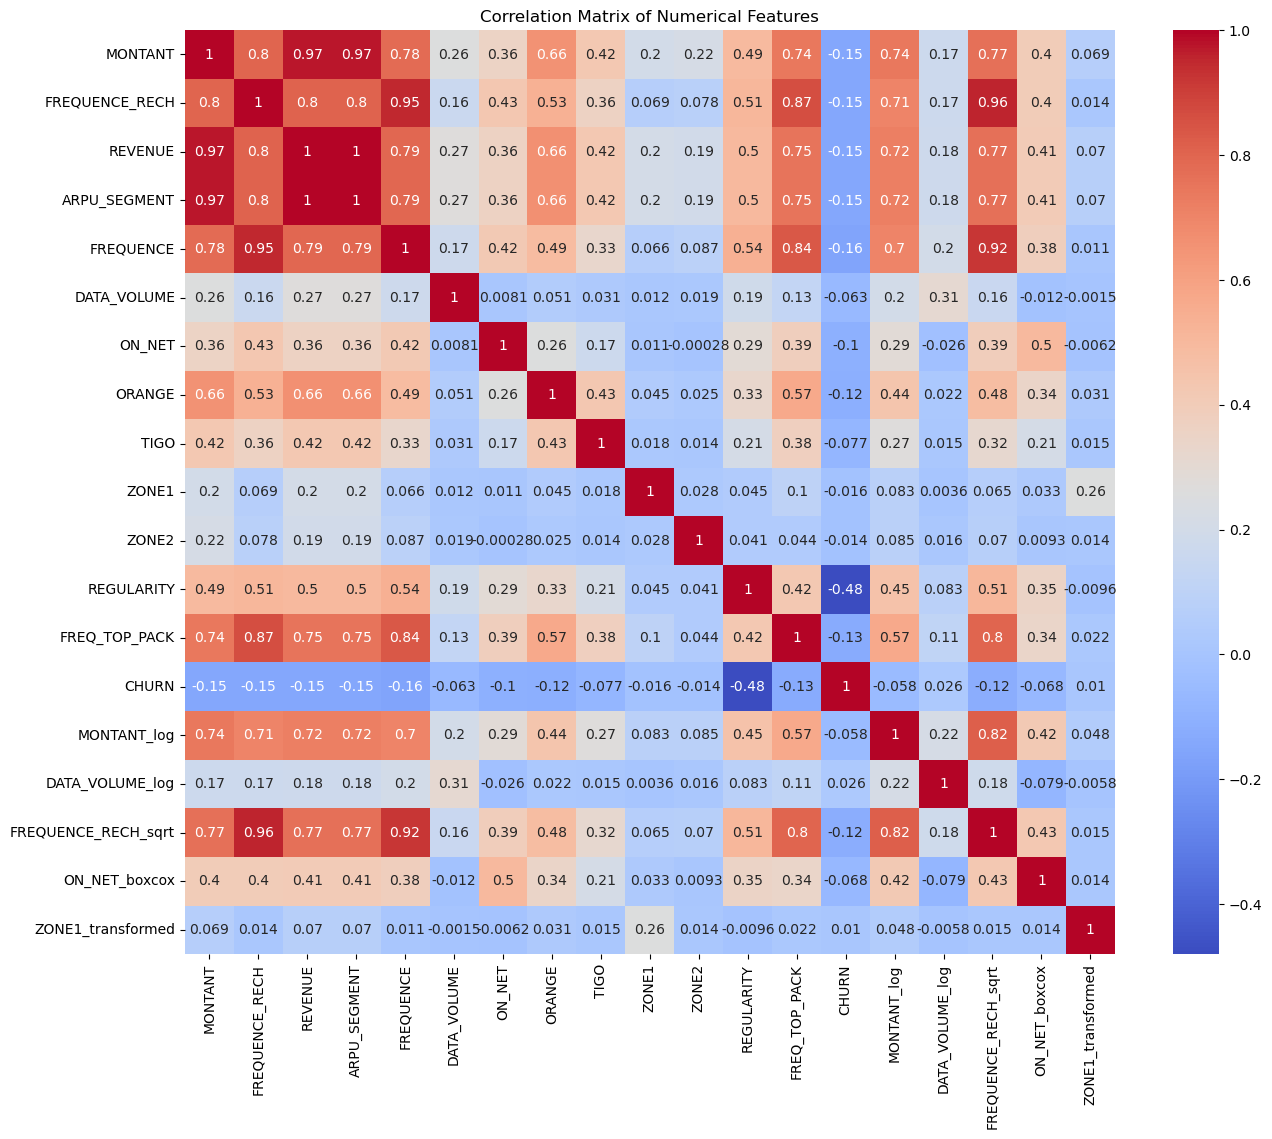

In [25]:
# Selecting numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numerical features
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [26]:
df['TENURE'].value_counts()

TENURE
K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: count, dtype: int64

To analyze the correlation between TENURE (categorical) and CHURN (binary)
Aggregate the CHURN column by TENURE to calculate statistics like the mean churn rate for each tenure category.
From the table, you can see that the churn rate (CHURN) varies across different TENURE groups. This indicates that there is likely some relationship between tenure and churn.
Since TENURE has a natural ordering (e.g., months increasing), you can map the categories to numerical values and use it directly in your model.
Each TENURE category represents a range of months. By taking the midpoint of each range, you assign a single value that is roughly in the center of the range, preserving the ordinal nature and allowing the model to treat the variable as continuous.

In [27]:
tenure_churn = df.groupby('TENURE')['CHURN'].mean().reset_index()
print(tenure_churn)
#This column contains 8 unique categories such as "K > 24 month."
#The most frequent category appears 2,043,201 times.

          TENURE     CHURN
0    D 3-6 month  0.154545
1    E 6-9 month  0.171833
2   F 9-12 month  0.240137
3  G 12-15 month  0.316287
4  H 15-18 month  0.266246
5  I 18-21 month  0.272693
6  J 21-24 month  0.230884
7   K > 24 month  0.183236


In [28]:
tenure_mapping = {
    'D 3-6 month': 4.5,
    'E 6-9 month': 7.5,
    'F 9-12 month': 10.5,
    'G 12-15 month': 13.5,
    'H 15-18 month': 16.5,
    'I 18-21 month': 19.5,
    'J 21-24 month': 22.5,
    'K > 24 month': 25
}

df['TENURE_NUMERIC'] = df['TENURE'].map(tenure_mapping)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              object 
 1   REGION               object 
 2   TENURE               object 
 3   MONTANT              float64
 4   FREQUENCE_RECH       float64
 5   REVENUE              float64
 6   ARPU_SEGMENT         float64
 7   FREQUENCE            float64
 8   DATA_VOLUME          float64
 9   ON_NET               float64
 10  ORANGE               float64
 11  TIGO                 float64
 12  ZONE1                float64
 13  ZONE2                float64
 14  MRG                  object 
 15  REGULARITY           int64  
 16  TOP_PACK             object 
 17  FREQ_TOP_PACK        float64
 18  CHURN                int64  
 19  MONTANT_log          float64
 20  DATA_VOLUME_log      float64
 21  FREQUENCE_RECH_sqrt  float64
 22  ON_NET_boxcox        float64
 23  ZONE1_transformed    float64
 24

In [30]:
categorical_cols =  ["REGION"]
# Apply one-hot encoding to the categorical columns
# - pd.get_dummies creates binary columns for each category in the categorical columns
df = pd.get_dummies(df, columns=categorical_cols)

# Set option to display all the columns
pd.set_option("display.max_columns", None)

In [33]:
X = df.drop(columns=["CHURN", "MONTANT", "ARPU_SEGMENT", "DATA_VOLUME","TIGO","TOP_PACK","user_id","MRG","TENURE","FREQUENCE_RECH","ON_NET","ZONE1"])# Features
y = df["CHURN"] 

In [34]:
# Split into Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)


(1723238, 26)
(1723238,)


In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=40)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After SMOTE
print(X_train_smote.shape)
print(y_train_smote.shape)

C:\Users\Special User\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Special User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Special User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


(2800578, 26)
(2800578,)


In [37]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [38]:
print(X_train_scaled.shape)
print(y_train_smote.shape)


(2800578, 26)
(2800578,)


In [39]:
print(X_test_scaled.shape)
print(y_test.shape)


(430810, 26)
(430810,)


In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(class_weight='balanced', random_state=40, max_iter=1000)

# Train the model
logistic_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set and evaluate
y_pred = logistic_model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
++ 
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8081961885750099
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87    349773
           1       0.49      0.89      0.64     81037

    accuracy                           0.81    430810
   macro avg       0.73      0.84      0.75    430810
weighted avg       0.88      0.81      0.83    430810

Confusion Matrix:
 [[276267  73506]
 [  9125  71912]]


While the overall accuracy is high (80.8%), it doesn’t fully reflect the performance on the minority class.

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={0: 1, 1: 3})  # Penalize class 1 errors more
model.fit(X_train_scaled, y_train_smote)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.69      0.81    349773
           1       0.42      0.95      0.58     81037

    accuracy                           0.74    430810
   macro avg       0.70      0.82      0.70    430810
weighted avg       0.88      0.74      0.77    430810



Tried cost sensitive learning to see if penalizing class 1 errrors more will hlp accuracy in my calss 1, didnt do much to my class 1
Many classifiers support adjusting penalties for misclassification

In [46]:
# Calculate scale_pos_weight
scale_pos_weight = len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train == 1])

In [48]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Train XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    eval_metric='aucpr',
    use_label_encoder=False,
    max_depth=6,
    eta=0.1,
    n_estimators=100
)

xgb_model.fit(X_train_scaled, y_train_smote)

# Evaluate Model
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate additional metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

print(f"ROC-AUC: {roc_auc}")
print(f"PR-AUC: {pr_auc}")

C:\Users\Special User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:54:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89    349773
           1       0.53      0.86      0.66     81037

    accuracy                           0.83    430810
   macro avg       0.75      0.84      0.77    430810
weighted avg       0.88      0.83      0.85    430810

ROC-AUC: 0.9163219621938841
PR-AUC: 0.6854900382946316


Decided to use ensemble methods and try a new model 
XGBoost with scale_pos_weight to handle class imbalance effectively.
Additionally, trying different evaluation metrics, such as ROC-AUC, PR-AUC, or a custom cost function, can provide a more comprehensive understanding of model performance.
My model's performance is more than "fair" at this point; it is quite strong, especially considering the class imbalance that likely exists in my dataset
PR-AUC: While 0.685 is fair, it suggests there is room for improvement in how the model handles the minority class.

In [49]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_auc_score

# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Generate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the best threshold based on F1-score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {precision[best_idx]:.2f}")
print(f"Recall: {recall[best_idx]:.2f}")
print(f"F1-Score: {f1_scores[best_idx]:.2f}")

# Apply the best threshold to get new predictions
y_pred_refined = (y_pred_proba >= best_threshold).astype(int)

# Generate the classification report
print("\nClassification Report with Refined Threshold:")
print(classification_report(y_test, y_pred_refined))

# Calculate additional metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"PR-AUC: {pr_auc:.2f}")

Best Threshold: 0.68
Precision: 0.60
Recall: 0.77
F1-Score: 0.67

Classification Report with Refined Threshold:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91    349773
           1       0.60      0.77      0.67     81037

    accuracy                           0.86    430810
   macro avg       0.77      0.82      0.79    430810
weighted avg       0.88      0.86      0.87    430810

ROC-AUC: 0.92
PR-AUC: 0.69


Refining the classification threshold is a great way to balance precision and recall especially in imbalanced datasets so that is what i tried doing here and the refined classification threshold of 0.68 provides a better balance between precision and recall for my dataset.
The ROC-AUC of 0.92 and PR-AUC of 0.69 confirm that the model is discriminating well between classes and is effective in handling the class imbalance.

In [50]:
# Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Generate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Test a range of thresholds
threshold_range = np.arange(0.1, 1.0, 0.01)  # From 0.1 to 1.0 with step size 0.01
metrics = {
    "Threshold": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for thresh in threshold_range:
    y_pred_temp = (y_pred_proba >= thresh).astype(int)
    report = classification_report(y_test, y_pred_temp, output_dict=True)
    metrics["Threshold"].append(thresh)
    metrics["Precision"].append(report["1"]["precision"])
    metrics["Recall"].append(report["1"]["recall"])
    metrics["F1-Score"].append(report["1"]["f1-score"])

# Convert metrics to numpy arrays for easier processing
metrics["Threshold"] = np.array(metrics["Threshold"])
metrics["Precision"] = np.array(metrics["Precision"])
metrics["Recall"] = np.array(metrics["Recall"])
metrics["F1-Score"] = np.array(metrics["F1-Score"])


# Find the best threshold
best_idx = np.argmax(metrics["F1-Score"])
optimal_threshold = metrics["Threshold"][best_idx]
optimal_precision = metrics["Precision"][best_idx]
optimal_recall = metrics["Recall"][best_idx]
optimal_f1_score = metrics["F1-Score"][best_idx]

# Display results
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Precision: {optimal_precision:.2f}")
print(f"Recall: {optimal_recall:.2f}")
print(f"F1-Score: {optimal_f1_score:.2f}")

# Generate classification report for the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print("\nClassification Report at Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

C:\Users\Special User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Special User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Special User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Special Us

Optimal Threshold: 0.68
Precision: 0.60
Recall: 0.77
F1-Score: 0.67

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91    349773
           1       0.60      0.77      0.67     81037

    accuracy                           0.86    430810
   macro avg       0.77      0.83      0.79    430810
weighted avg       0.88      0.86      0.87    430810



Decided to do further tuning and Iteratively test thresholds around the best_threshold for marginal improvements
Precision: 0.60 (60% of predicted positives are actual positives)
Recall: 0.77 (77% of actual positives are correctly identified)
F1-Score: 0.67 (harmonic mean of precision and recall, giving a balance between them)
The refined threshold has improved recall (from previous iterations) while maintaining reasonable precision and F1-score. 

In [54]:
# Assuming your model's feature importances can be accessed via the model object
feature_importances = xgb_model.feature_importances_

# Ensure that 'X' is a DataFrame so we can extract the column names
if isinstance(X, pd.DataFrame):
    feature_names = X.columns  # Extract column names
else:
    raise ValueError("X should be a DataFrame to extract feature names.")

# Create a DataFrame for feature importance
features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
features = features.sort_values(by='Importance', ascending=False)

# Display the top features
print(features.head(10))


                Feature  Importance
12         REGION_DAKAR    0.340152
4            REGULARITY    0.331012
8   FREQUENCE_RECH_sqrt    0.037243
10    ZONE1_transformed    0.024449
3                 ZONE2    0.023029
1             FREQUENCE    0.020373
0               REVENUE    0.019870
5         FREQ_TOP_PACK    0.019130
11       TENURE_NUMERIC    0.017272
2                ORANGE    0.015660


In [55]:
X.columns

Index(['REVENUE', 'FREQUENCE', 'ORANGE', 'ZONE2', 'REGULARITY',
       'FREQ_TOP_PACK', 'MONTANT_log', 'DATA_VOLUME_log',
       'FREQUENCE_RECH_sqrt', 'ON_NET_boxcox', 'ZONE1_transformed',
       'TENURE_NUMERIC', 'REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK',
       'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU',
       'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR'],
      dtype='object')

In [51]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\special user\anaconda3\lib\site-packages (1.37.1)



In [52]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [57]:
with open("streamlit_expresso.py", "w") as file:
    file.write("""
          
import streamlit as st
import numpy as np
import joblib

# Load your trained model
xgb_model = joblib.load('xgb_model.pkl')

# Streamlit Application
st.title("Churn Prediction App")
st.header("Enter the Features")

# Input fields for top features with descriptive labels
region_dakar = st.number_input("Region Dakar (e.g., 1 for Yes, 0 for No)", min_value=0, max_value=1, step=1)
regularity = st.number_input("Regularity (e.g., 10)", min_value=0.0)
freq_rech_sqrt = st.number_input("Frequency Recharge (Square Root, e.g., 3.5)", min_value=0.0)
zone1_transformed = st.number_input("Zone 1 Transformed (e.g., 0.75)", min_value=0.0)
zone2 = st.number_input("Zone 2 (e.g., 1 for Yes, 0 for No)", min_value=0, max_value=1, step=1)

# Define the remaining features and their default values
all_features = ['REVENUE', 'FREQUENCE', 'ORANGE', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK',
                'MONTANT_log', 'DATA_VOLUME_log', 'FREQUENCE_RECH_sqrt', 'ON_NET_boxcox',
                'ZONE1_transformed', 'TENURE_NUMERIC', 'REGION_DAKAR', 'REGION_DIOURBEL',
                'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU',
                'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_SAINT-LOUIS',
                'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR']

# Exclude top features
remaining_features = [feature for feature in all_features if feature not in ['REGION_DAKAR', 'REGULARITY', 'FREQUENCE_RECH_sqrt', 'ZONE1_transformed', 'ZONE2']]
default_values = {feature: 0 for feature in remaining_features}

# Button to make predictions
if st.button("Predict"):
    # Create a feature array
    inputs = [
        region_dakar,
        regularity,
        freq_rech_sqrt,
        zone1_transformed,
        zone2,
        *default_values.values()  # Add default values for the remaining features
    ]
    feature_array = np.array(inputs).reshape(1, -1)
    
    # Make prediction
    prediction = xgb_model.predict(feature_array)
    probability = xgb_model.predict_proba(feature_array)[0][1]
    
    # Display results
    st.write(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
    st.write(f"Churn Probability: {probability:.2f}")

""")
